### Import Libraries

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

### Membaca Dataset

In [105]:
df = pd.read_csv('Dataset/clean_data.csv', encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,POSTAGE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,False
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,False


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,402465.0,12.044613,172.851011,-74215.0,2.00,5.00,12.00,74215.00
UnitPrice,402465.0,3.074758,19.957253,0.0,1.25,1.95,3.75,8142.75
CustomerID,402465.0,15287.516733,1713.831208,12346.0,13952.00,15152.00,16791.00,18287.00
year,402465.0,2010.934064,0.248171,2010.0,2011.00,2011.00,2011.00,2011.00
month,402465.0,7.611469,3.417015,1.0,5.00,8.00,11.00,12.00
day,402465.0,15.039529,8.654786,1.0,7.00,15.00,22.00,31.00
hour,402465.0,12.735522,2.285196,6.0,11.00,13.00,14.00,20.00


In [107]:
df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,402465,21951,576339,534
StockCode,402465,3594,85123A,2077
Description,402465,3783,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,402465,20278,2011-11-14 15:27:00,534
Country,402465,37,United Kingdom,357878


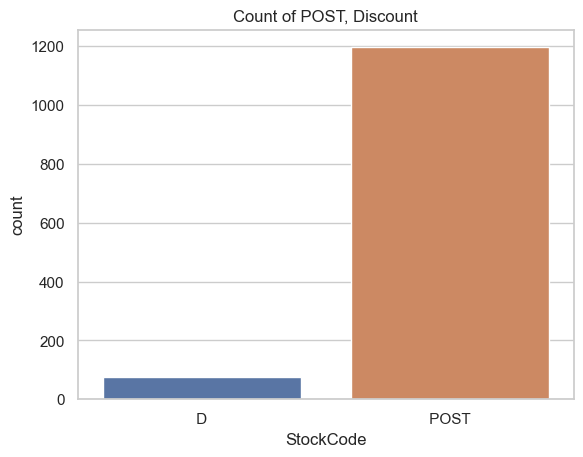

In [108]:
D = df[df['StockCode']=='D'].value_counts().sum()
POST = df[df['StockCode']=='POST'].value_counts().sum()

#toframe
df1 = pd.DataFrame({'StockCode':[' D ', ' POST '], 'count':[D, POST]})

#plot
sns.barplot(x='StockCode', y='count', data=df1)
plt.title("Count of POST, Discount")
plt.show()  

In [109]:
customer1 = df[(df['CustomerID'] == 12583.0) & ((df['StockCode'] == 'POST') | (df['StockCode'].isna() == False))]
customer1[customer1['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,POSTAGE


In [110]:
customer2 = df[(df['CustomerID'] == 16274.0) & ((df['StockCode'] == 'POST') | (df['StockCode'].isna() == False))]
customer2[customer2['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,POSTAGE


In [111]:
quantity_per_year = df.groupby('year')['Quantity'].sum()

quantity_per_year

year
2010     292259.0
2011    4555276.0
Name: Quantity, dtype: float64

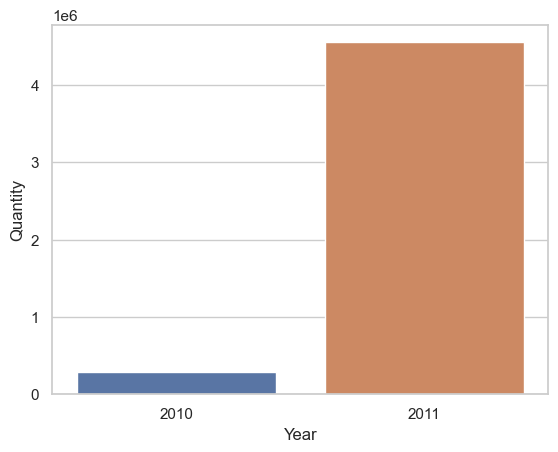

In [112]:
sns.barplot(data=quantity_per_year, x=quantity_per_year.index, y=quantity_per_year.values)
plt.xticks(range(len(quantity_per_year.index)), quantity_per_year.index)

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

In [113]:
#after_filter = df.drop(filter.index, inplace=True)
#after_filter

In [114]:
desc_per_country = df.groupby('Description')['Country'].value_counts()

#to frame
desc_per_country = desc_per_country.to_frame()
desc_per_country = desc_per_country.reset_index()

#sort
desc_per_country = desc_per_country.sort_values(by=['count'], ascending=False)
desc_per_country

,Description,Country,count
18165,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1980
13239,REGENCY CAKESTAND 3 TIER,United Kingdom,1574
8146,JUMBO BAG RED RETROSPOT,United Kingdom,1505
1071,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,1343
11010,PARTY BUNTING,United Kingdom,1327
...,...,...,...
12776,RED REFECTORY CLOCK,Spain,1
12775,RED REFECTORY CLOCK,Australia,1
5947,FLUTED ANTIQUE CANDLE HOLDER,France,1
5951,FLYING PIG WATERING CAN,France,1


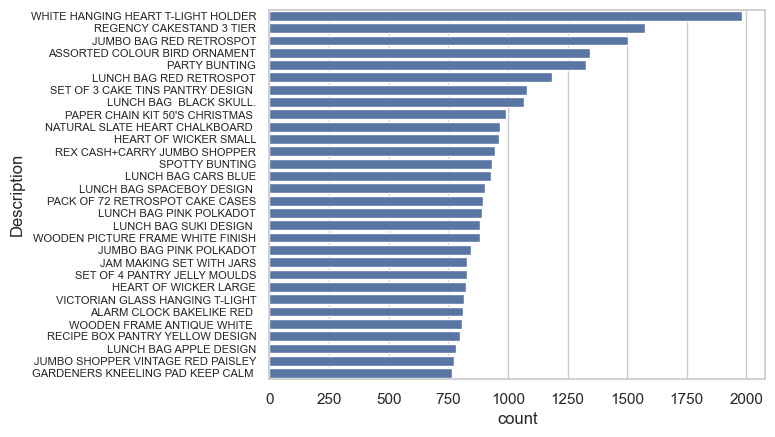

In [115]:
#plot top30
sns.barplot(data=desc_per_country.head(30), x='count', y='Description', hue='Country')

#legend false
plt.legend([],[], frameon=False)
#set font of yticks
plt.yticks(fontsize=8)
plt.show()

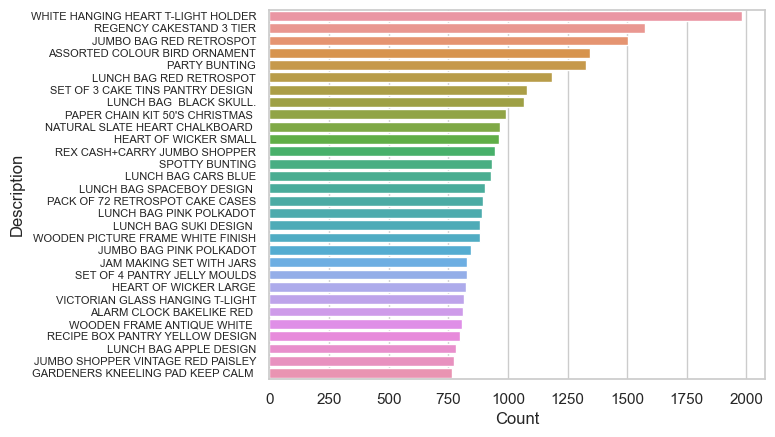

In [116]:
desc_in_uk = desc_per_country[desc_per_country['Country'] == 'United Kingdom']

#plot top15
sns.barplot(data=desc_in_uk.head(30), x='count', y='Description')
plt.xlabel('Count')
plt.ylabel('Description')
plt.yticks(fontsize=8)
plt.show()

In [117]:
desc_per_country['Country'].unique()

array(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Finland', 'Netherlands', 'Switzerland', 'Portugal', 'Sweden',
       'Norway', 'Italy', 'Austria', 'Denmark', 'Australia', 'Cyprus',
       'Poland', 'Japan', 'Channel Islands', 'Iceland', 'Malta', 'Greece',
       'USA', 'Singapore', 'Czech Republic', 'Israel', 'Unspecified',
       'Canada', 'European Community', 'Bahrain', 'Lithuania',
       'Saudi Arabia', 'Lebanon', 'RSA', 'Brazil', 'United Arab Emirates'],
      dtype=object)

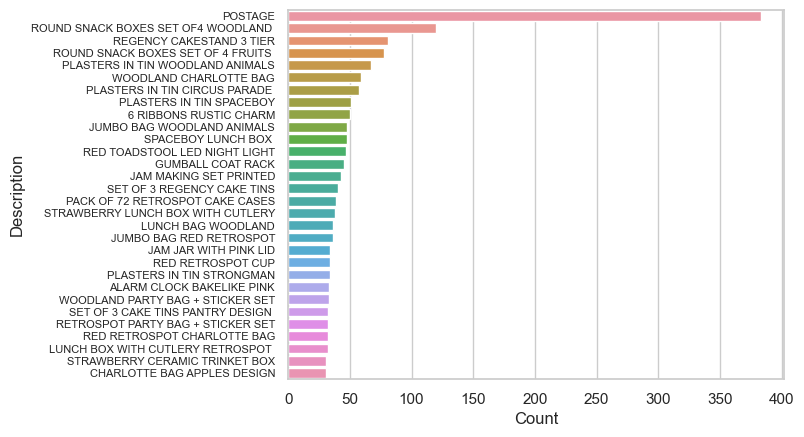

In [118]:
desc_in_german = desc_per_country[desc_per_country['Country']=='Germany']

sns.barplot(data=desc_in_german.head(30), x='count', y='Description')
plt.xlabel('Count')
plt.ylabel('Description')
plt.yticks(fontsize=8)
plt.show()

In [119]:
quantity_per_item = df.groupby('Description')['Quantity'].agg('sum')

quantity_per_item = quantity_per_item.sort_values(ascending=False)

#change column name
quantity_per_item = quantity_per_item.to_frame()
quantity_per_item = quantity_per_item.reset_index()
quantity_per_item = quantity_per_item.rename(columns={'Quantity':'Total Quantity'})

In [134]:
post = df[(df['StockCode']=='POST') & (df['Country']=='United Kingdom')]
post['UnitPrice'].mean()

211.12802325581393

In [136]:
post = df[(df['StockCode']=='POST') & (df['Country']=='Germany')]
#post['UnitPrice'].mean()

post


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,POSTAGE
1115,536527,POST,POSTAGE,1.0,2010-12-01 13:04:00,18.0,12662.0,Germany,2010,12,1,13,True
3813,536840,POST,POSTAGE,1.0,2010-12-02 18:27:00,18.0,12738.0,Germany,2010,12,2,18,True
4108,536861,POST,POSTAGE,3.0,2010-12-03 10:44:00,18.0,12427.0,Germany,2010,12,3,10,True
4449,536967,POST,POSTAGE,1.0,2010-12-03 12:57:00,18.0,12600.0,Germany,2010,12,3,12,True
4673,536983,POST,POSTAGE,1.0,2010-12-03 14:30:00,18.0,12712.0,Germany,2010,12,3,14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399720,581266,POST,POSTAGE,5.0,2011-12-08 11:25:00,18.0,12621.0,Germany,2011,12,8,11,True
402055,581494,POST,POSTAGE,2.0,2011-12-09 10:13:00,18.0,12518.0,Germany,2011,12,9,10,True
402287,581570,POST,POSTAGE,1.0,2011-12-09 11:59:00,18.0,12662.0,Germany,2011,12,9,11,True
402324,581574,POST,POSTAGE,2.0,2011-12-09 12:09:00,18.0,12526.0,Germany,2011,12,9,12,True


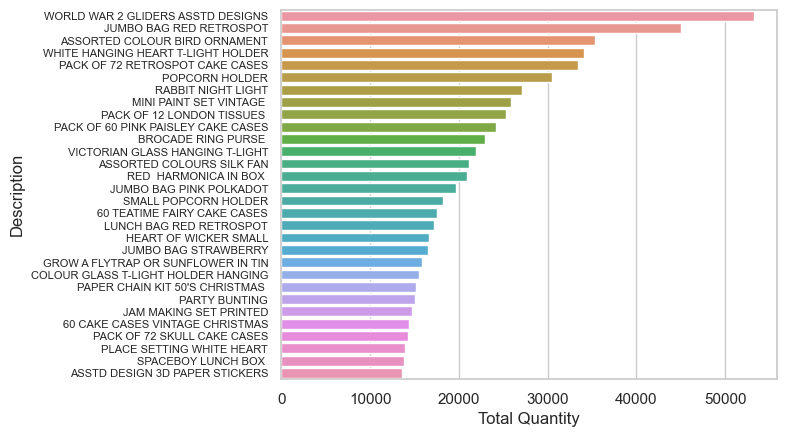

In [120]:
sns.barplot(data=quantity_per_item.head(30), x='Total Quantity', y='Description')
plt.xlabel('Total Quantity')
plt.ylabel('Description')
plt.yticks(fontsize=8)
plt.show()

In [121]:
quantity_per_country = df.groupby('Country')['Quantity'].agg('sum')

quantity_per_country = quantity_per_country.sort_values(ascending=False)

#change column name
quantity_per_country = quantity_per_country.to_frame()
quantity_per_country = quantity_per_country.reset_index()
quantity_per_country = quantity_per_country.rename(columns={'Quantity':'Total Quantity'})

quantity_per_country

,Country,Total Quantity
0,United Kingdom,3957981.0
1,Netherlands,198820.0
2,EIRE,134210.0
3,Germany,116776.0
4,France,109473.0
5,Australia,81613.0
6,Sweden,35348.0
7,Switzerland,29602.0
8,Spain,26583.0
9,Japan,24897.0


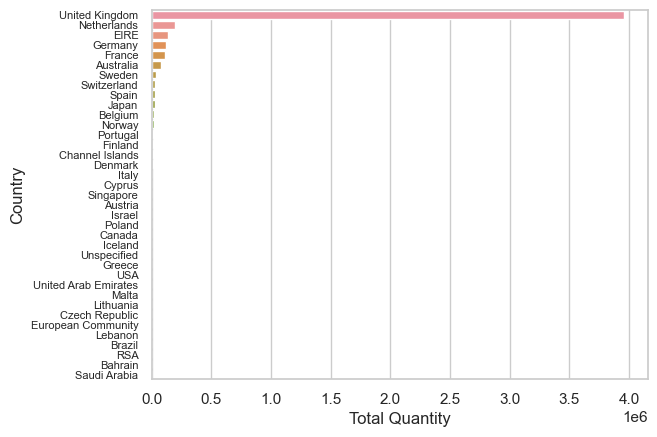

In [122]:
sns.barplot(data=quantity_per_country, x='Total Quantity', y='Country')
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.yticks(fontsize=8)

#add vertical lines for the mean
#plt.axvline(quantity_per_country['Total Quantity'].mean(), color='green', linestyle='--')

plt.show()

In [123]:
import plotly.express as px

# Create a choropleth map using plotly
fig = px.choropleth(quantity_per_country, locations='Country', locationmode='country names', color='Total Quantity',
                    hover_name='Country', color_continuous_scale='greens', range_color=(0, 100000))

# Update the map layout
fig.update_layout(
    title='Choropleth Map of Total Quantity per Country',
    xaxis=dict(title='Total Quantity'),
    yaxis=dict(title='Country')
)

#add annotator for arrow directing to United Kingdom and United States
fig.add_annotation(x=0.49, y=0.83, text="United Kingdom", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.28, y=0.72, text="United States of America", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.76, y=0.39, text="Australia", showarrow=True, arrowhead=1)
                


# Show the map
fig.show()


In [124]:
#create line plot for quantity trend 
trend = df.groupby(['year', 'month', 'day', 'hour'])['Quantity'].agg('sum')
trend = trend.to_frame()
trend = trend.reset_index()
#trend = trend[trend['year']==2011]
trend

,year,month,day,hour,Quantity
0,2010,12,1,8,602.0
1,2010,12,1,9,3257.0
2,2010,12,1,10,2770.0
3,2010,12,1,11,2300.0
4,2010,12,1,12,4095.0
...,...,...,...,...,...
2887,2011,12,9,8,2913.0
2888,2011,12,9,9,1113.0
2889,2011,12,9,10,2003.0
2890,2011,12,9,11,1274.0


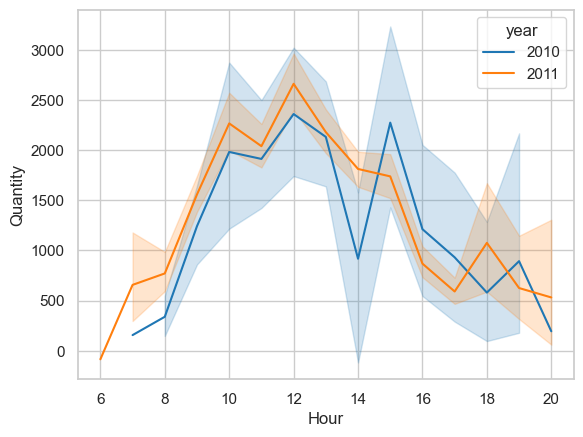

In [125]:
#plot tren
sns.lineplot(data=trend, x='hour', y='Quantity', hue='year', palette='tab10')

plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.show()

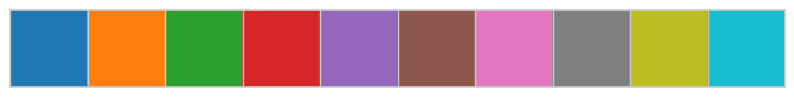

In [126]:
#print palette
sns.palplot(sns.color_palette('tab10', 10))


In [127]:
perbandingan_harga_item = df[['Description', 'UnitPrice']]


In [128]:
df[df['Description']=='PICNIC BASKET WICKER 60 PIECES']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,POSTAGE
157215,556444,22502,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,2011,6,10,15,False
157216,556446,22502,PICNIC BASKET WICKER 60 PIECES,1.0,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,2011,6,10,15,False


In [129]:
perbandingan_harga_item = perbandingan_harga_item.drop_duplicates(subset=['Description'])
perbandingan_harga_item = perbandingan_harga_item.sort_values('UnitPrice', ascending=False)
perbandingan_harga_item

,Description,UnitPrice
157215,PICNIC BASKET WICKER 60 PIECES,649.500
3733,VINTAGE RED KITCHEN CABINET,295.000
15965,LOVE SEAT ANTIQUE WHITE METAL,175.000
12627,REGENCY MIRROR WITH SHUTTERS,165.000
245,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.000
...,...,...
7733,FOLDING CAMPING SCISSOR W/KNIF & S,0.120
218,DISCO BALL CHRISTMAS DECORATION,0.100
79735,WRAP BAD HAIR DAY,0.100
10380,PORCELAIN BUDAH INCENSE HOLDER,0.070


In [ ]:
perbandingan_harga_item[perbandingan_harga_item['Description'] == 'WORLD WAR GLIDERS ASSTD']

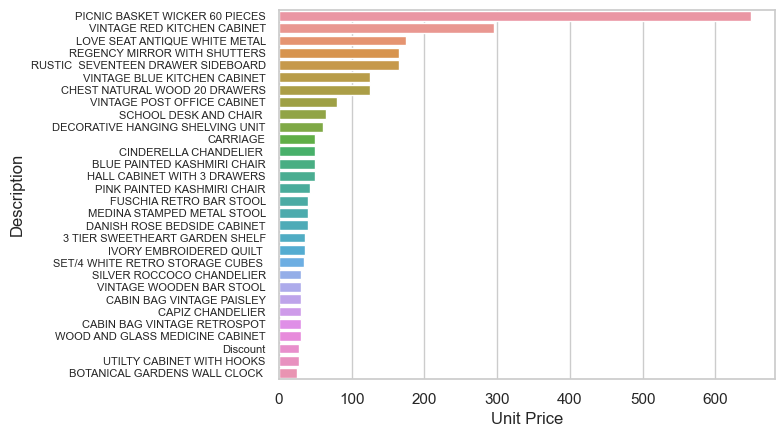

In [130]:
sns.barplot(data=perbandingan_harga_item.head(30), x='UnitPrice', y='Description')
plt.xlabel('Unit Price')
plt.ylabel('Description')
plt.yticks(fontsize=8)
#plt.axvline(perbandingan_harga_item['UnitPrice'].mean(), color='green', linestyle='--')

plt.show()